# Graph Non Isomorphism Interactive Protocol
First of all, we fix a random seed, and some sizes for the graphs in question

In [38]:
# Parameters for the interactive simulation
V = 10
E = 10
generate_isomorphic = False

def random_permute(G):
    perm = Permutations(G.vertices()).random_element()
    newG = G.relabel(perm, inplace=False)
    return (newG, perm)

def isomorphic_graphs(V, E):
    G_1 = graphs.RandomGNM(V, E)
    G_2, _ = random_permute(G_1)
    return G_1, G_2

def non_isomorphic_graphs(V, E):
    G_1 = G_2 = Graph()
    while G_1.is_isomorphic(G_2):
        G_1 = graphs.RandomGNM(V, E)
        G_2 = graphs.RandomGNM(V, E)
    return G_1, G_2


We generate two graph, and check that they are not isomorphic (even tough we would need to be really unlucky for them to be)

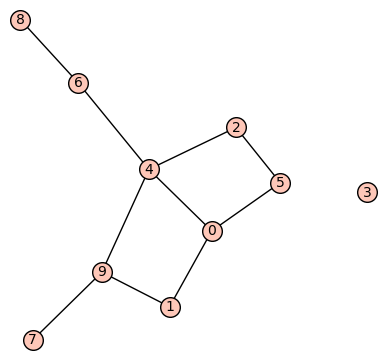

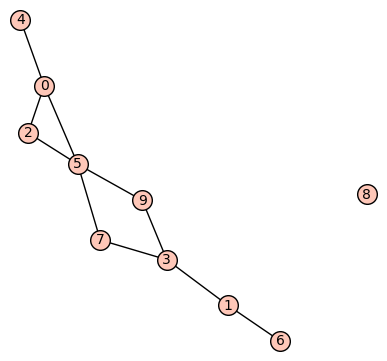

In [39]:
G_1, G_2 = isomorphic_graphs(V, E) if generate_isomorphic else non_isomorphic_graphs(V, E)

G_1.show()
G_2.show()

Now, we work onto the proof, here is the verifier first step

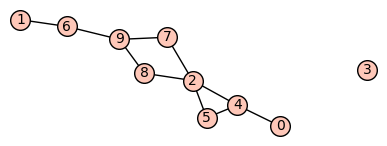

In [40]:
i = randint(1,2)
G, pi = random_permute(G_1 if i == 1 else G_2)
G.show()

Now, the prover given only G needs to be able to figure out what of the two graphs it is isomorphic to.
Note that this is where the prover uses its superior computational ability

In [41]:
j = 1 if G_1.is_isomorphic(G) else 2

Finally, the verifier check that i == j

In [42]:
i == j

True

# Repetition
Let us now encapsulate the above procedure, and repeat it to ensure that it is not possible to fool the verifier as much

In [43]:
def procedure(G_1, G_2):
    # Verifier step
    i = randint(1,2)
    G, pi = random_permute(G_1 if i == 1 else G_2)
    
    # Prover answer
    j = 1 if G_1.is_isomorphic(G) else 2
    
    # Verifier check
    return i == j

We will run two experiments, one generating some random isomorphic graphs (in which case we expect 50% of the cases to fail), and one running with two non isomorphic graphs

In [44]:
# Experiment Parameters
N = 2000
V = 10
E = 20


def experiment(V, E, graph_gen_fun, N, K):
    success_count = 0
    for i in range(0, N):
        G_1, G_2 = graph_gen_fun(V, E)
        # Repeat the experiment multiple times
        failure = False
        for j in range(0, K):
            if not procedure(G_1, G_2):
                failure = True
                break
        success_count += not failure
    return success_count / N

Here is the experiment in the case G_1, G_2 are not isomorphic, we expect the resulting probability to be 1

In [45]:
experiment(V, E, non_isomorphic_graphs, N, 1)

1

Here instead we run it with two isomorphic graphs, and we expect the success probability to hover around 1/2

In [46]:
experiment(V, E, isomorphic_graphs, N, 1)

1001/2000

Finally, let us try to see what the trend is for success rate when k increases. By the merit of our discussions we expect to see an exponentially declining trend.

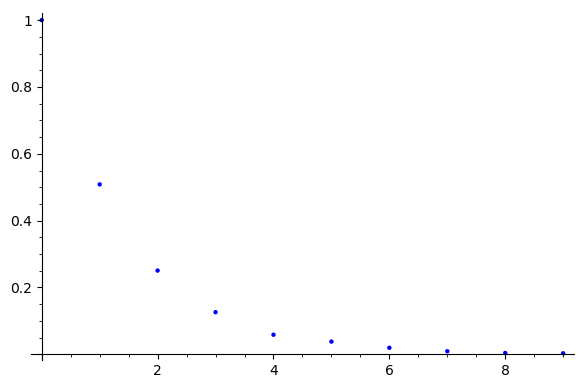

In [47]:
list_plot([experiment(V, E, isomorphic_graphs, N, k) for k in range(0, 10)])